# Week9 - Ensemble Assignment

1. Train Model
* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings
* Save the best model

2. In a new notebook, load the saved model
* Evaluate your results data with `generate_dataset_prod()`

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset(sample=1000, random_state=42):
    X, y = make_circles(n_samples=sample,noise=0.1, random_state=random_state)
    df1 = pd.DataFrame(X)
    df1['y'] = y

    X1, y1 = make_moons(n_samples=sample, noise=0.1, random_state=random_state)
    df2 = pd.DataFrame(X1)
    df2['y'] = y

    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

# production data - use this in the new notebook with the saved model
def generate_dataset_prod(sample=300, random_state=60):
    X, y = make_circles(n_samples=sample,noise=0.1, random_state=random_state)
    df1 = pd.DataFrame(X)
    df1['y'] = y

    X1, y1 = make_moons(n_samples=sample, noise=0.1, random_state=random_state)
    df2 = pd.DataFrame(X1)
    df2['y'] = y

    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [72]:
X, y = generate_dataset()

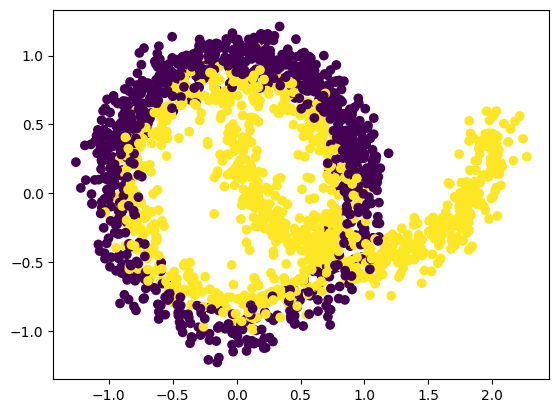

In [73]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [74]:
y.value_counts()

,count
y,
0,1000
1,1000


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
randomf = RandomForestClassifier(n_estimators=100, random_state=42)
randomf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
bagging = BaggingClassifier (n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(n_estimators=50, random_state=42)

In [78]:
boost = AdaBoostClassifier (n_estimators=100, learning_rate=0.1, random_state=42)
boost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [79]:
from sklearn.metrics import accuracy_score, classification_report

all_models = {'Random Forest model': randomf,'Bagging model': bagging,'Boosting model': boost}
for name, model in all_models.items():
  pred_y = model.predict(X_test)
  accscore = accuracy_score(y_test, pred_y)
  confmatrix = confusion_matrix(y_test, pred_y)
  print(f'{name} Accuracy: {accscore}')
  print(f'{name} Confusion Matrix: {confmatrix}')


Random Forest model Accuracy: 0.87
Random Forest model Confusion Matrix: [[168  30]
 [ 22 180]]
Bagging model Accuracy: 0.86
Bagging model Confusion Matrix: [[169  29]
 [ 27 175]]
Boosting model Accuracy: 0.705
Boosting model Confusion Matrix: [[133  65]
 [ 53 149]]


In [80]:
#best model file
joblib.dump(boost, 'bestmodel.pkl')

['bestmodel.pkl']

The accuracy of the models is as follows:

Random forest model = 87%

Bagging model = 86%

and Boosting model = 70%

From above we can see that the random forest gives the best accuracy reflecting good recall and precision. The Bagging model also has close score with random forest but it displays few mistakes hence score is low than random forest. The Boosting model did the worst.